In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

Read SeriousMD data

In [2]:
doctors = pd.read_parquet('cleaned/doctors.parquet')
clinics = pd.read_parquet('cleaned/clinics.parquet')
patients = pd.DataFrame()
for i in range(8):
    temp = pd.read_parquet(f"cleaned/px_{i+1}.parquet")
    patients = pd.concat([patients,temp])
appointments = pd.read_parquet('cleaned/appointments.parquet')

In [3]:
appt_clinics = appointments.merge(clinics, on='clinicid', how='inner')
appt_city = appt_clinics['City'].value_counts().reset_index()
appt_prov = appt_clinics['Province'].value_counts().reset_index()
appt_city.columns = ['city', 'appt']
appt_prov.columns = ['province', 'appt']

In [139]:
appt_city

,city,appt
0,Quezon City,144476
1,Makati City,44079
2,Pozzorubio,25187
3,Manila,22435
4,Iloilo City,17793
5,General Santos City,16192
6,Cebu City,13204
7,Dumaguete City,9184
8,Malabon,4833
9,Muntinlupa,4828


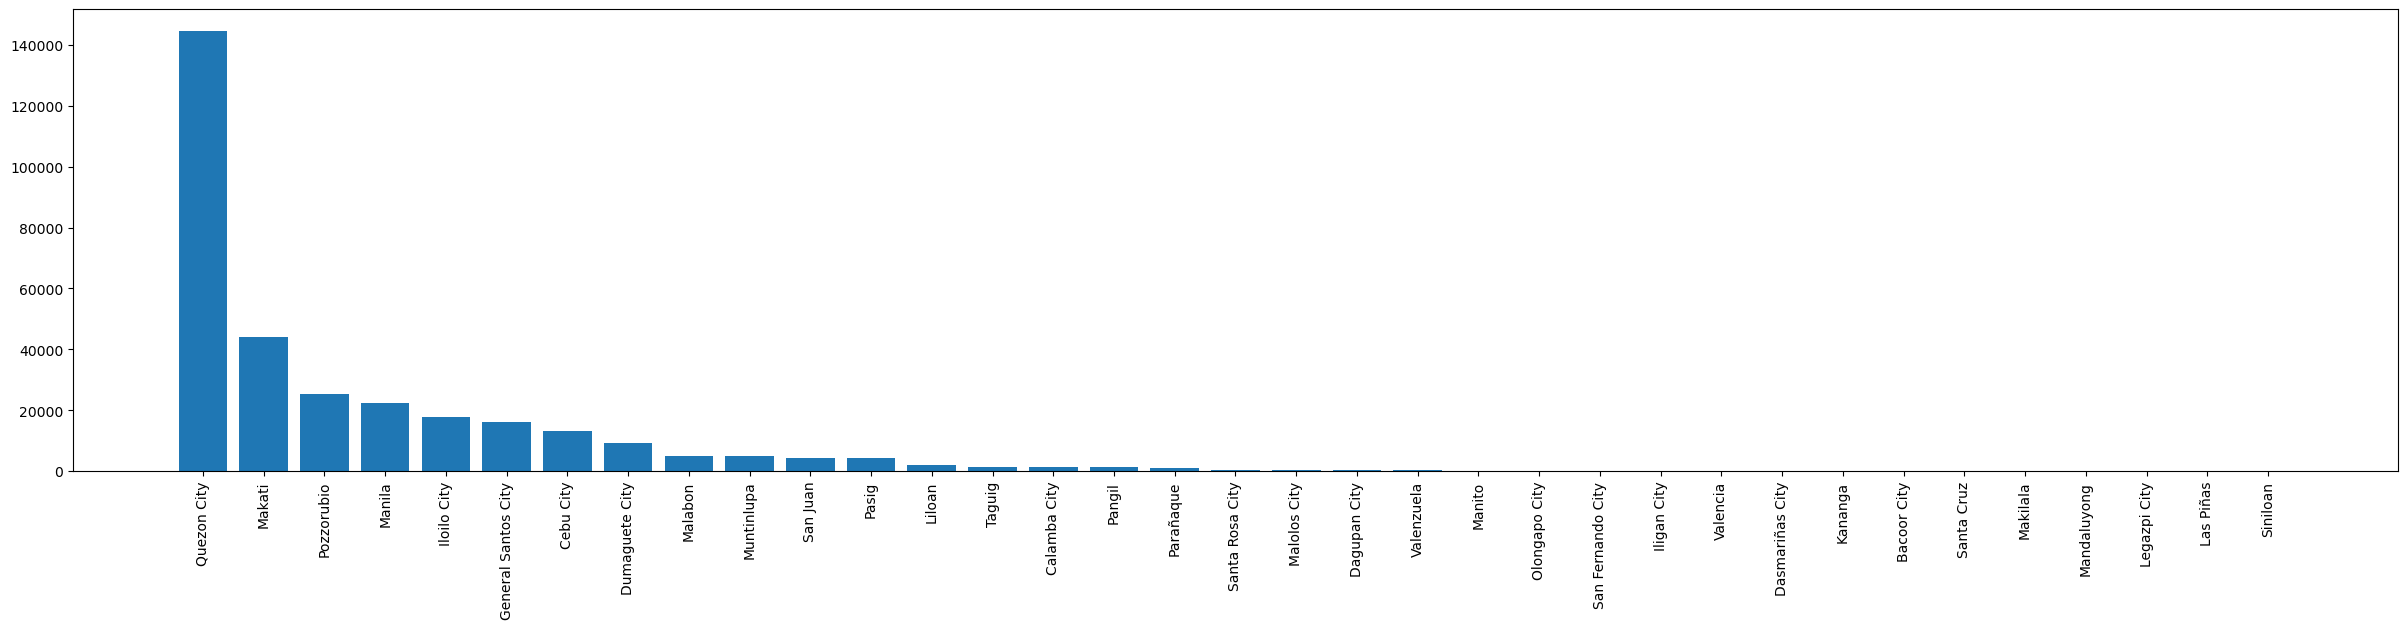

In [4]:
plt.figure(figsize=(30,6))
plt.bar(x=appt_city['city'], height=appt_city['appt'])
plt.xticks(rotation=90)
plt.show()

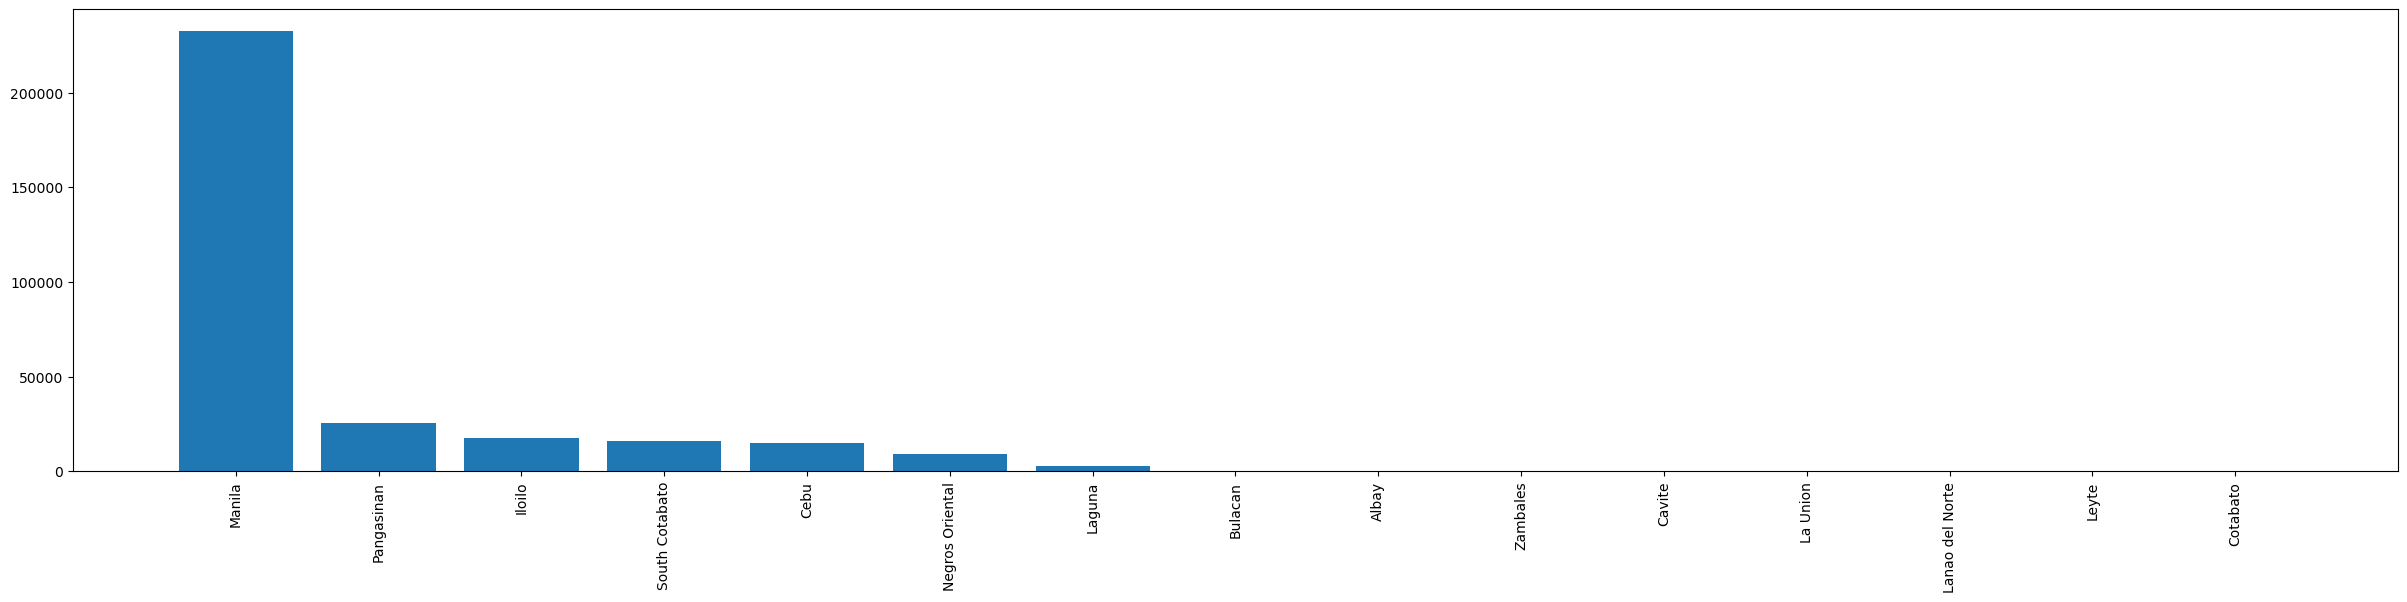

In [5]:
plt.figure(figsize=(30,6))
plt.bar(x=appt_prov['province'], height=appt_prov['appt'])
plt.xticks(rotation=90)
plt.show()

Read PH Map

In [6]:
ph_map = gpd.GeoDataFrame.from_file('gadm41_PHL_shp/gadm41_PHL_2.shp')
ph_map_2 = gpd.GeoDataFrame.from_file('gadm41_PHL_shp/gadm41_PHL_1.shp')

Merge City and Map

In [7]:
# match the city names
appt_city.iloc[1, 0] = 'Makati City'
appt_city.iloc[10,0] = 'San Juan - Manila'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'San Juan') & (ph_map['NAME_1'] == 'Metropolitan Manila')].index[0],6] = 'San Juan - Manila'
appt_city.iloc[12,0] = 'Liloan - Cebu'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'Liloan') & (ph_map['NAME_1'] == 'Cebu')].index[0],6] = 'Liloan - Cebu'
appt_city.iloc[23,0] = 'San Fernando City - La Union'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'San Fernando City') & (ph_map['NAME_1'] == 'La Union')].index[0], 6] = 'San Fernando City - La Union'
appt_city.iloc[25,0] = 'Valencia - Negros Oriental'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'Valencia') & (ph_map['NAME_1'] == 'Negros Oriental')].index[0], 6] = 'Valencia - Negros Oriental'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'Dasmariñas')].index[0],6] = 'Dasmariñas City'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'Bacoor')].index[0],6] = 'Bacoor City'
appt_city.iloc[29,0] = 'Santa Cruz - Laguna'
ph_map.iloc[ph_map[(ph_map['NAME_2'] == 'Santa Cruz') & (ph_map['NAME_1'] == 'Laguna')].index[0], 6] = 'Santa Cruz - Laguna'
appt_city

,city,appt
0,Quezon City,144476
1,Makati City,44079
2,Pozzorubio,25187
3,Manila,22435
4,Iloilo City,17793
5,General Santos City,16192
6,Cebu City,13204
7,Dumaguete City,9184
8,Malabon,4833
9,Muntinlupa,4828


In [8]:
# check if all city names equal
for city in list(appt_city['city']):
    if len(ph_map[[True if city in each else False for each in ph_map['NAME_2']]]) != 1:
        print(city)

Manila


In [9]:
df_map = ph_map[['NAME_1','NAME_2','geometry']]
df_map.columns = ['province', 'city', 'geometry']

In [10]:
regions = {
    'Luzon': [  
        'Abra',
        'Albay',
        'Apayao',
        'Aurora',
        'Bataan',
        'Batanes',
        'Batangas',
        'Benguet',
        'Bulacan',
        'Cagayan',
        'Camarines Norte',
        'Camarines Sur',
        'Catanduanes',
        'Cavite',
        'Ifugao',
        'Ilocos Norte',
        'Ilocos Sur',
        'Isabela',
        'Kalinga',
        'La Union',
        'Laguna',
        'Marinduque',
        'Masbate',
        'Mountain Province',
        'Nueva Ecija',
        'Nueva Vizcaya',
        'Occidental Mindoro',
        'Oriental Mindoro',
        'Palawan',
        'Pampanga',
        'Pangasinan',
        'Quezon',
        'Quirino',
        'Rizal',
        'Romblon',
        'Sorsogon',
        'Tarlac',
        'Zambales',
        'Metropolitan Manila'
    ],
    'Visayas': [
        'Aklan',
        'Antique',
        'Biliran',
        'Bohol',
        'Capiz',
        'Cebu',
        'Eastern Samar',
        'Guimaras',
        'Iloilo',
        'Leyte',
        'Negros Occidental',
        'Negros Oriental',
        'Northern Samar',
        'Samar',
        'Siquijor',
        'Southern Leyte'
    ],
    'Mindanao': [
        'Agusan del Norte',
        'Agusan del Sur',
        'Basilan',
        'Bukidnon',
        'Camiguin',
        'Cotabato',
        'Compostela Valley',
        'Davao del Norte',
        'Davao del Sur',
        'Davao Occidental',
        'Davao Oriental',
        'Dinagat Islands',
        'Lanao del Norte',
        'Lanao del Sur',
        'Maguindanao',
        'Misamis Occidental',
        'Misamis Oriental',
        'Sarangani',
        'North Cotabato',
        'South Cotabato',
        'Sultan Kudarat',
        'Sulu',
        'Surigao del Norte',
        'Surigao del Sur',
        'Tawi-Tawi',
        'Zamboanga del Norte',
        'Zamboanga del Sur',
        'Zamboanga Sibugay'
    ]
}

In [11]:
#   North Luzon Agribusiness Quadrangle
#   Metro Luzon Urban Beltway
#   Central Philippines
#   Mindanao
super_regions = {
    'NLAQ':[
        'Ilocos Norte',
        'Ilocos Sur',
        'La Union',
        'Pangasinan',
        'Abra',
        'Apayao',
        'Benguet',
        'Ifugao',
        'Kalinga',
        'Mountain Province',
        'Batanes',
        'Cagayan',
        'Isabela',
        'Nueva Vizcaya',
        'Quirino'
    ],
    'MLUB':[
        'Aurora',
        'Bataan',
        'Bulacan',
        'Nueva Ecija',
        'Pampanga',
        'Tarlac',
        'Zambales',
        'Metropolitan Manila',
        'Marinduque',
        'Occidental Mindoro',
        'Oriental Mindoro',
        'Cavite',
        'Laguna',
        'Quezon',
        'Rizal',
        'Batangas',
    ],
    'CPR':[
        'Romblon',
        'Palawan',
        'Sorsogon',
        'Albay',
        'Camarines Norte',
        'Camarines Sur',
        'Catanduanes',
        'Masbate','Aklan',
        'Antique',
        'Biliran',
        'Bohol',
        'Capiz',
        'Cebu',
        'Eastern Samar',
        'Guimaras',
        'Iloilo',
        'Leyte',
        'Negros Occidental',
        'Negros Oriental',
        'Northern Samar',
        'Samar',
        'Siquijor',
        'Southern Leyte'
    ],
    'MSR': [
        'Agusan del Norte',
        'Agusan del Sur',
        'Basilan',
        'Bukidnon',
        'Camiguin',
        'Cotabato',
        'Compostela Valley',
        'Davao del Norte',
        'Davao del Sur',
        'Davao Occidental',
        'Davao Oriental',
        'Dinagat Islands',
        'Lanao del Norte',
        'Lanao del Sur',
        'Maguindanao',
        'Misamis Occidental',
        'Misamis Oriental',
        'Sarangani',
        'North Cotabato',
        'South Cotabato',
        'Sultan Kudarat',
        'Sulu',
        'Surigao del Norte',
        'Surigao del Sur',
        'Tawi-Tawi',
        'Zamboanga del Norte',
        'Zamboanga del Sur',
        'Zamboanga Sibugay'
    ]
}

In [12]:
list_of_regions = []
for each in df_map['province']:
    isInLoc = False
    for eachLoc in regions:
        if each in regions[eachLoc]:
            list_of_regions.append(eachLoc)
            isInLoc = True
            break
    if not isInLoc:
        print(each)
list_of_sregions = []
for each in df_map['province']:
    isInLoc = False
    for eachLoc in super_regions:
        if each in super_regions[eachLoc]:
            list_of_sregions.append(eachLoc)
            isInLoc = True
            break
    if not isInLoc:
        print(each)

In [13]:
df_map['island'] = list_of_regions
df_map['sregion'] = list_of_sregions
df_map = df_map[['island', 'sregion', 'province', 'city', 'geometry']]
df_map.iloc[df_map[(df_map['city'] == 'Hinunangan') & (df_map['province'] == 'Quezon')].index[0], 1] = 'CPR'
df_map = df_map[['island', 'sregion', 'province', 'city', 'geometry']]

C:\Users\Kyle Carlo C. Lasala\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Kyle Carlo C. Lasala\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
df_map.iloc[df_map[(df_map['city'] == 'Hinunangan') & (df_map['province'] == 'Quezon')].index[0], ]

island                                                  Luzon
sregion                                                   CPR
province                                               Quezon
city                                               Hinunangan
geometry    MULTIPOLYGON (((125.22194671500017 10.43416977...
Name: 1309, dtype: object

In [15]:
df_map[(df_map['city'] == 'Hinunangan')]

,island,sregion,province,city,geometry
1309,Luzon,CPR,Quezon,Hinunangan,"MULTIPOLYGON (((125.22195 10.43417, 125.22278 ..."
1443,Visayas,CPR,Southern Leyte,Hinunangan,"POLYGON ((125.13713 10.35281, 125.13493 10.358..."


In [16]:
choropleth_df = df_map.merge(appt_city, on='city', how='left')

In [17]:
choropleth_df['coords'] = choropleth_df['geometry'].apply(lambda x: x.representative_point().coords[:])
choropleth_df['coords'] = [coords[0] for coords in choropleth_df['coords']]

In [18]:
def map_plot(super_region, portrait=True):
    ax = choropleth_df[choropleth_df.sregion == super_region].plot(
        figsize=((10,15) if portrait else (15,10)), 
        column='appt', 
        legend=True,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "grey",
            "label": "Missing values",
        }
    )
    for idx, row in choropleth_df.iterrows():
        if row['sregion'] == super_region and pd.notna(row['appt']):
            ax.text(
                row.coords[0] + (0.15 if idx % 2 == 0 else -0.15), 
                row.coords[1] + (0.05 if idx % 2 == 0 else -0.10), 
                s=row['city'], 
                horizontalalignment='center', 
                bbox={'facecolor': 'white', 'alpha':0.1, 'pad': 5, 'edgecolor':'none'},
                fontsize=6
            )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

# Appointments in Northern Luzon 

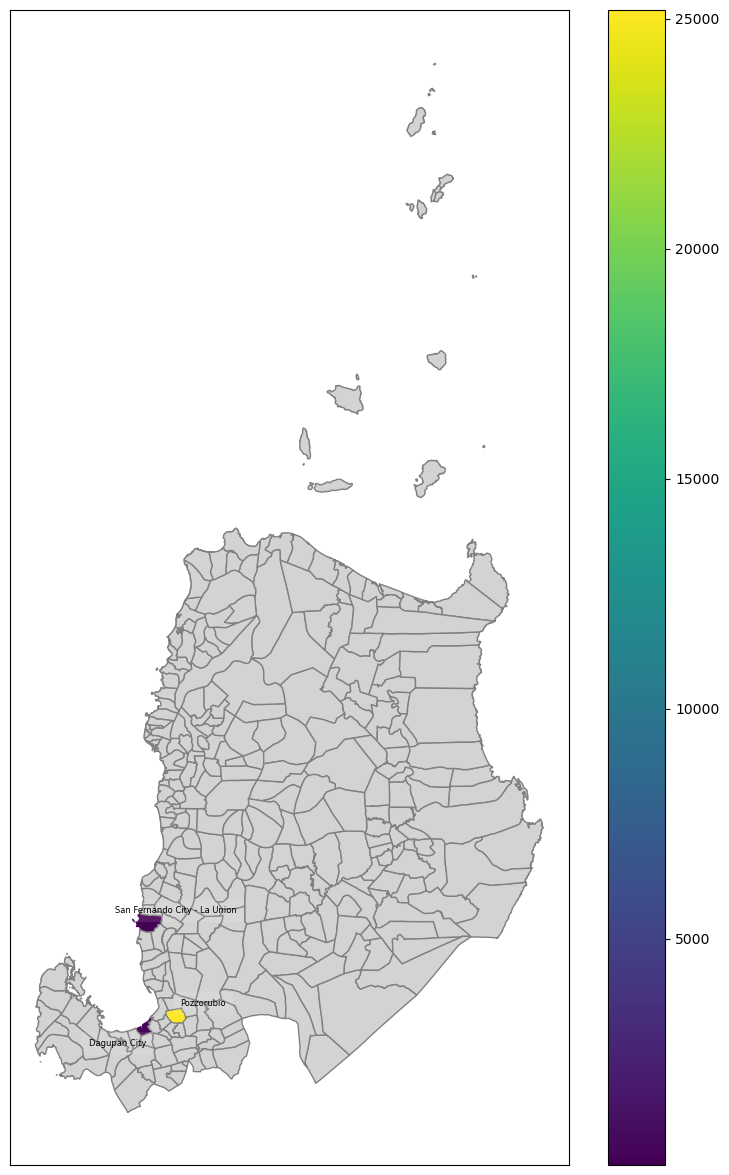

In [19]:
map_plot('NLAQ')

# Appointments in Metro Luzon Urban Beltway

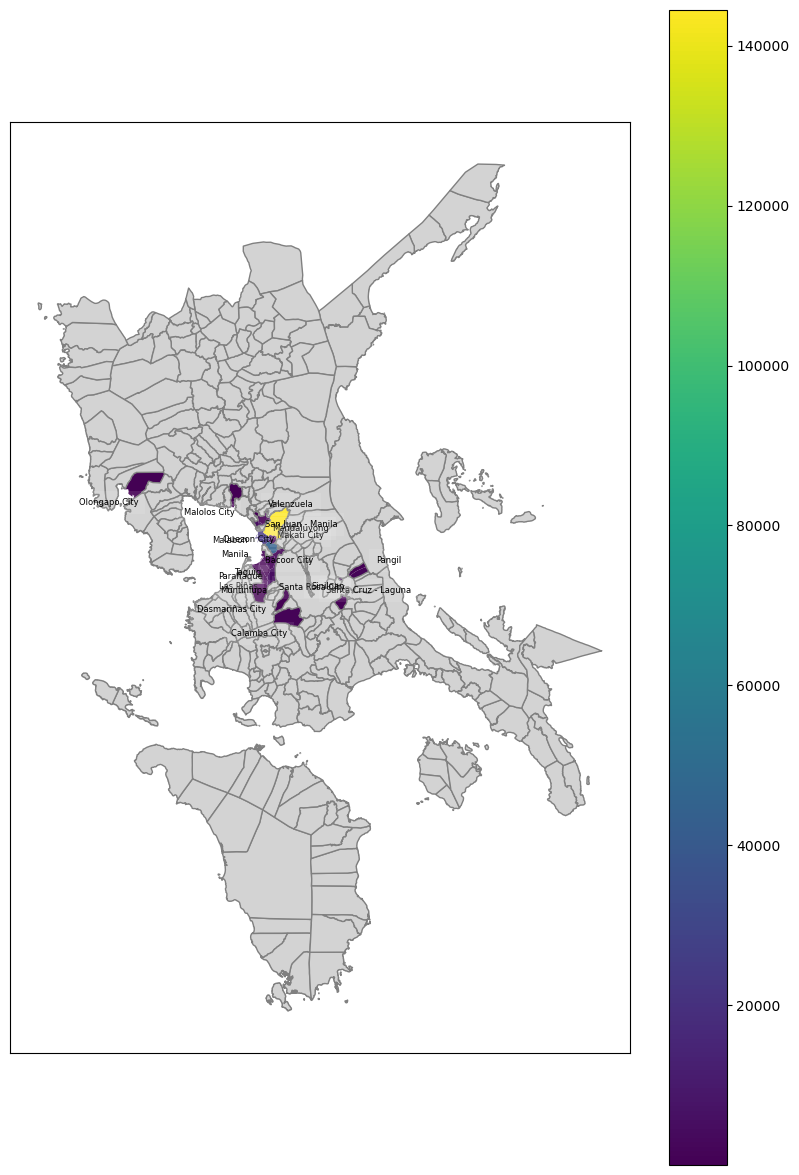

In [20]:
map_plot('MLUB')

# Appointments in Central Philippines

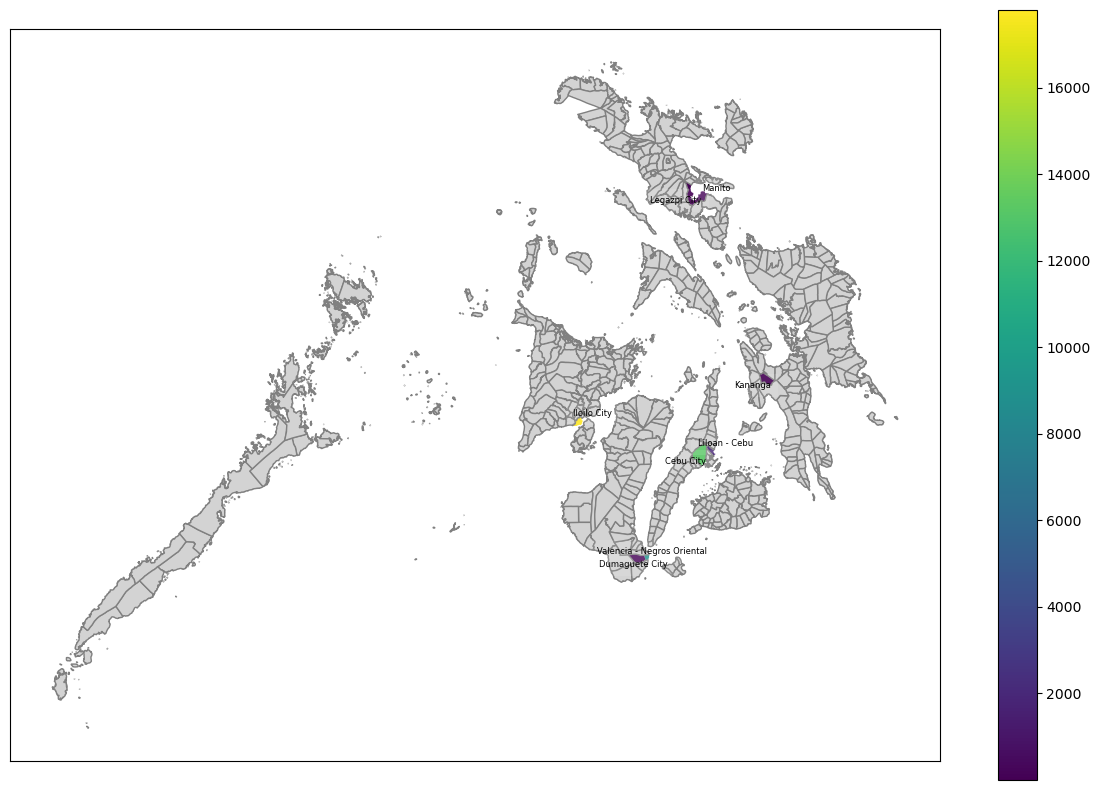

In [21]:
map_plot('CPR', portrait=False)

# Appointments in Mindanao

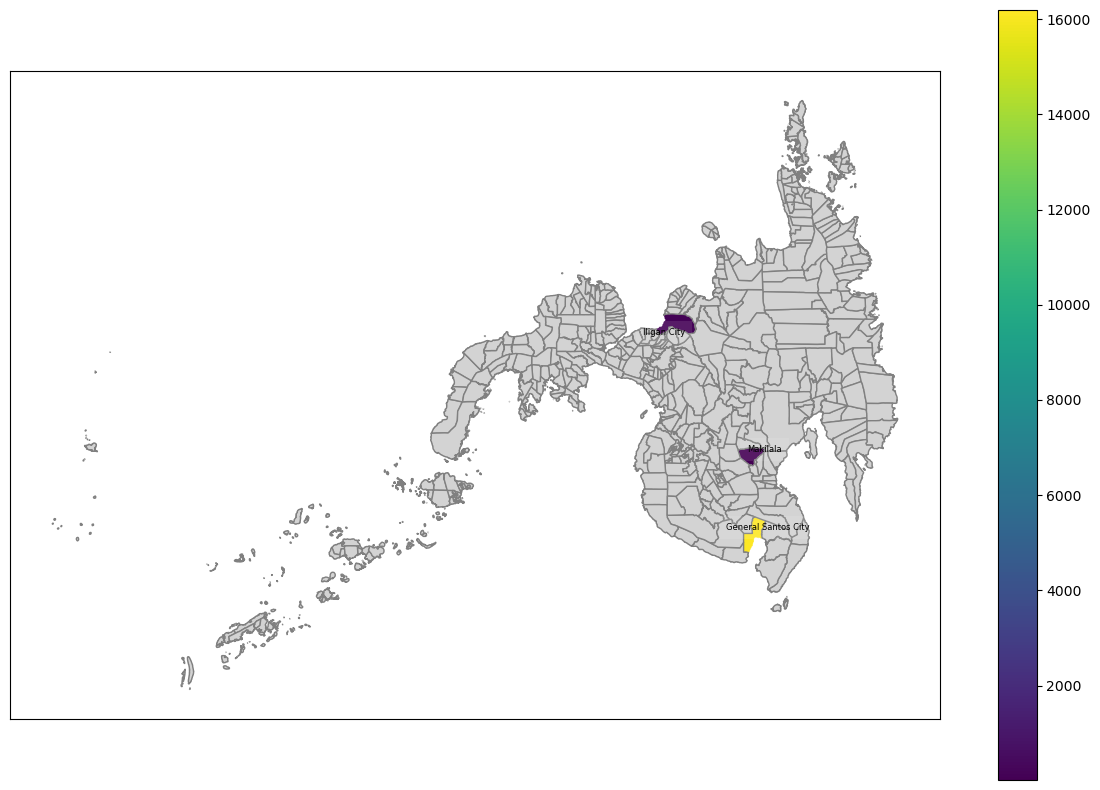

In [22]:
map_plot('MSR', portrait=False)

Read Internet Connectivity Data

In [23]:
ph_net = pd.read_excel('SR_Statistical Tables_Household Convenience.xlsx', sheet_name='Table B', skiprows=[0,1])

In [24]:
ph_net = ph_net[['Region','Number of Households With at least One Type of Internet Connection']].loc[3:19].reset_index().drop('index', axis=1)

In [27]:
ph_net.columns = ['region', 'net']

In [35]:
ph_net

,region,net
0,NATIONAL CAPITAL REGION,2605190.0
1,CORDILLERA ADMINISTRATIVE REGION (CAR),275777.0
2,REGION I (ILOCOS REGION),725144.0
3,REGION II (CAGAYAN VALLEY),495485.0
4,REGION III (CENTRAL LUZON),1893735.0
5,REGION IV-A (CALABARZON),2849422.0
6,MIMAROPA REGION,412750.0
7,REGION V (BICOL REGION),666714.0
8,REGION VI (WESTERN VISAYAS),994105.0
9,REGION VII (CENTRAL VISAYAS),1004341.0


In [34]:
subregions = {
    "Caloocan City",
    "Las Piñas City",
    "Makati City",
    "Malabon City",
    "Mandaluyong City",
    "Manila City",
    "Marikina City",
    "Muntinlupa City",
    "Navotas City",
    "Parañaque City",
    "Pasay City",
    "Pasig City",
    "Quezon City",
    "San Juan City",
    "Taguig City",
    "Valenzuela City"
}

{'Luzon': ['Abra',
  'Albay',
  'Apayao',
  'Aurora',
  'Bataan',
  'Batanes',
  'Batangas',
  'Benguet',
  'Bulacan',
  'Cagayan',
  'Camarines Norte',
  'Camarines Sur',
  'Catanduanes',
  'Cavite',
  'Ifugao',
  'Ilocos Norte',
  'Ilocos Sur',
  'Isabela',
  'Kalinga',
  'La Union',
  'Laguna',
  'Marinduque',
  'Masbate',
  'Mountain Province',
  'Nueva Ecija',
  'Nueva Vizcaya',
  'Occidental Mindoro',
  'Oriental Mindoro',
  'Palawan',
  'Pampanga',
  'Pangasinan',
  'Quezon',
  'Quirino',
  'Rizal',
  'Romblon',
  'Sorsogon',
  'Tarlac',
  'Zambales',
  'Metropolitan Manila'],
 'Visayas': ['Aklan',
  'Antique',
  'Biliran',
  'Bohol',
  'Capiz',
  'Cebu',
  'Eastern Samar',
  'Guimaras',
  'Iloilo',
  'Leyte',
  'Negros Occidental',
  'Negros Oriental',
  'Northern Samar',
  'Samar',
  'Siquijor',
  'Southern Leyte'],
 'Mindanao': ['Agusan del Norte',
  'Agusan del Sur',
  'Basilan',
  'Bukidnon',
  'Camiguin',
  'Cotabato',
  'Compostela Valley',
  'Davao del Norte',
  'Davao d

In [80]:
# match the region names
subregions = {
    'NCR': ['Metropolitan Manila'],
    'CAR': ["Abra", "Apayao", "Benguet", "Ifugao", "Kalinga", "Mountain Province"],
    'R1': ["Ilocos Norte", "Ilocos Sur", "La Union", "Pangasinan", "Dagupan"],
    'R2': ["Batanes", "Cagayan", "Isabela", "Nueva Vizcaya", "Quirino"],
    'R3': ["Aurora", "Bataan", "Bulacan", "Nueva Ecija", "Pampanga", "Tarlac", "Zambales"],
    'R4A': ["Cavite", "Laguna", "Batangas", "Rizal", "Quezon"],
    'R4B': ["Occidental Mindoro", "Oriental Mindoro", "Marinduque", "Romblon", "Palawan"],
    'R5': ["Albay", "Camarines Norte", "Camarines Sur", "Catanduanes", "Masbate", "Sorsogon"],
    'R6': ["Aklan", "Antique", "Capiz", "Guimaras", "Iloilo", "Negros Occidental"],
    'R7': ["Cebu", "Bohol", "Negros Oriental", "Siquijor"],
    "R8": ["Samar", "Leyte", "Southern Leyte", "Biliran", "Eastern Samar", "Northern Samar", "Western Samar"],
    "R9": ["Zamboanga del Norte", "Zamboanga del Sur", "Zamboanga Sibugay"],
    "R10": ["Bukidnon", "Camiguin", "Lanao del Norte", "Misamis Occidental", "Misamis Oriental"],
    "R11": ["Compostela Valley", "Davao del Norte", "Davao del Sur", "Davao Occidental", "Davao Oriental"],
    "R12": ["North Cotabato", "Cotabato", "South Cotabato", "Sultan Kudarat", "Sarangani"],
    "R13": ["Agusan del Norte", "Agusan del Sur", "Dinagat Islands", "Surigao del Norte", "Surigao del Sur"],
    "BARMM": ["Basilan", "Lanao del Sur", "Maguindanao", "Sulu", "Tawi-Tawi"]
}
ph_net['region'] = list(subregions.keys())
ph_net

,region,net
0,NCR,2605190.0
1,CAR,275777.0
2,R1,725144.0
3,R2,495485.0
4,R3,1893735.0
5,R4A,2849422.0
6,R4B,412750.0
7,R5,666714.0
8,R6,994105.0
9,R7,1004341.0


In [91]:
df_map2 = ph_map_2[['NAME_1', 'geometry']]
df_map2.columns = ['provinces', 'geometry']

In [92]:
list_of_subregions = []
for each in df_map2['provinces']:
    isInLoc = False
    for eachLoc in subregions:
        if each in subregions[eachLoc]:
            list_of_subregions.append(eachLoc)
            isInLoc = True
            break
    if not isInLoc:
        print(each)

In [93]:
df_map2['region'] = list_of_subregions
df_map2 = df_map2[['region', 'provinces', 'geometry']]

C:\Users\Kyle Carlo C. Lasala\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [103]:
choropleth_df2 = df_map2.merge(ph_net, on='region', how='inner')
choropleth_df2['coords'] = choropleth_df2['geometry'].apply(lambda x: x.representative_point().coords[:])
choropleth_df2['coords'] = [coords[0] for coords in choropleth_df2['coords']]

In [104]:
choropleth_df2

,region,provinces,geometry,net,coords
0,CAR,Abra,"POLYGON ((120.74773 17.15755, 120.73747 17.156...",275777.0,"(120.80032873477373, 17.569519996500105)"
1,CAR,Apayao,"POLYGON ((121.11682 17.74139, 121.11263 17.768...",275777.0,"(121.198944992276, 18.08057498950012)"
2,CAR,Benguet,"POLYGON ((120.65534 16.18766, 120.62601 16.201...",275777.0,"(120.71269752997328, 16.565179825000143)"
3,CAR,Ifugao,"POLYGON ((121.17967 16.63791, 121.17861 16.637...",275777.0,"(121.18288138867729, 16.837994575000067)"
4,CAR,Kalinga,"POLYGON ((121.07594 17.21743, 121.07032 17.223...",275777.0,"(121.3246175371339, 17.42593002400008)"
...,...,...,...,...,...
76,R12,South Cotabato,"POLYGON ((125.23561 6.12256, 125.23441 6.11934...",499153.0,"(124.71999287357747, 6.313309909000139)"
77,R12,Sultan Kudarat,"POLYGON ((124.39507 6.20870, 124.39348 6.20754...",499153.0,"(124.32391175316619, 6.498470068500126)"
78,R9,Zamboanga del Norte,"MULTIPOLYGON (((121.90389 7.15028, 121.90417 7...",255484.0,"(122.47341211536647, 7.937010050500135)"
79,R9,Zamboanga del Sur,"MULTIPOLYGON (((122.06706 6.86892, 122.06729 6...",255484.0,"(123.25718245564468, 7.798470021000043)"


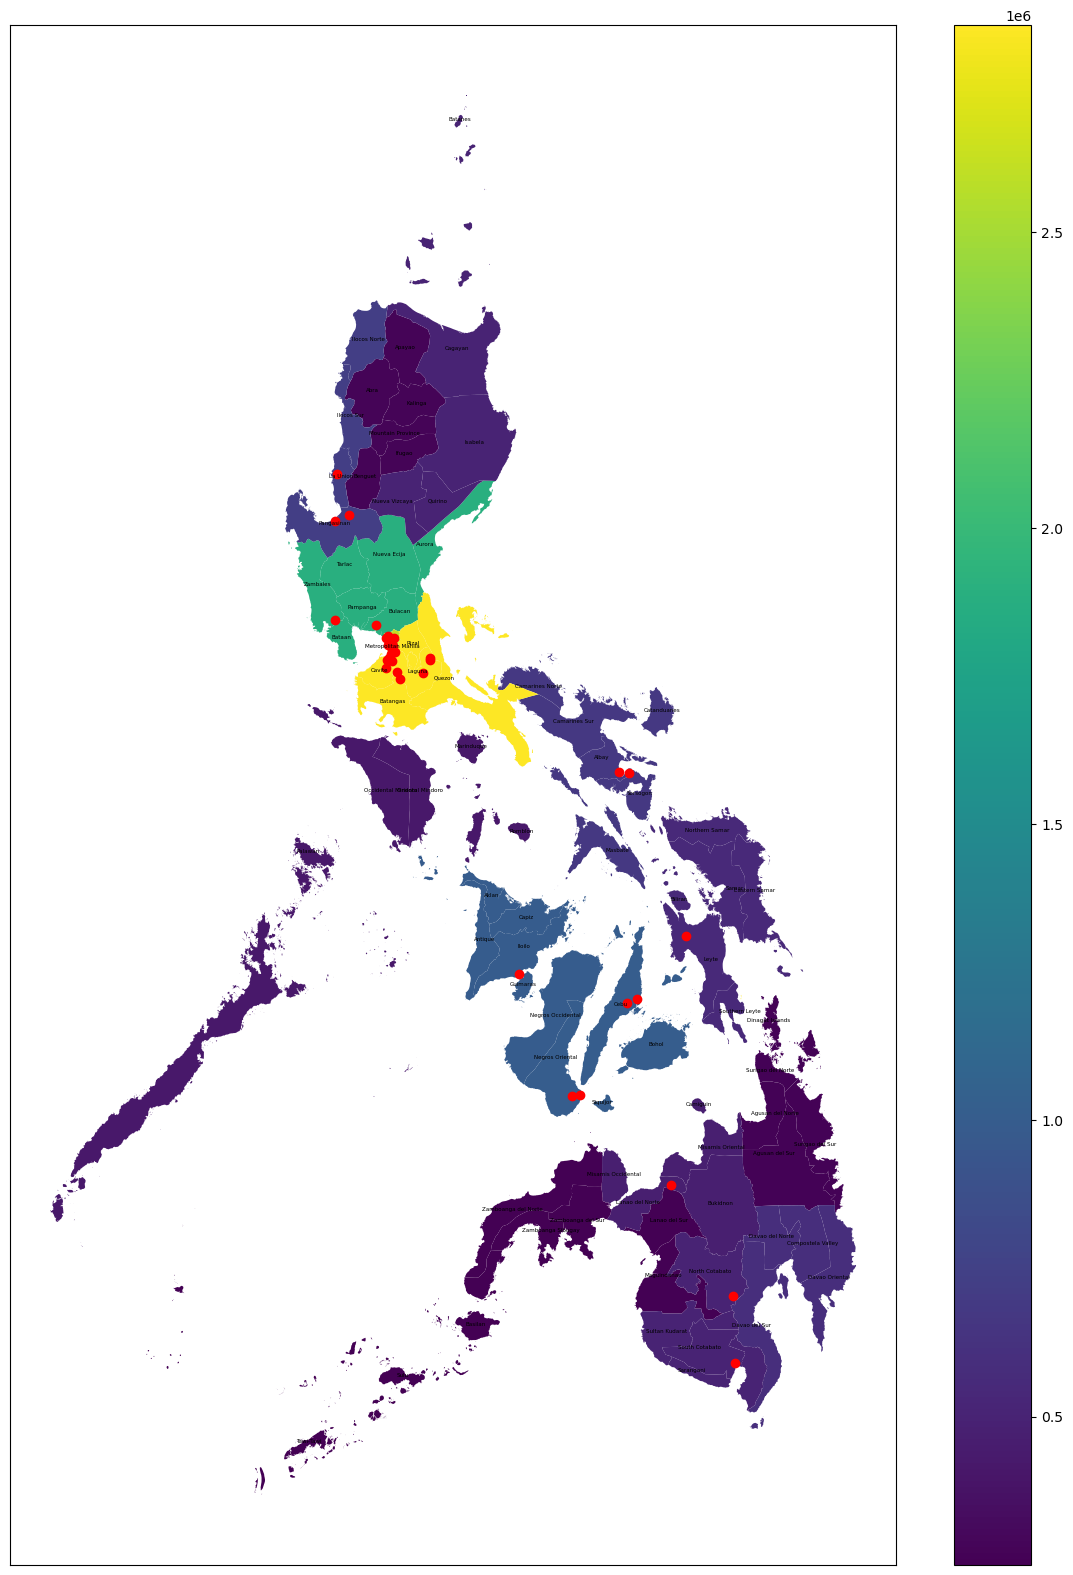

In [137]:
ax = choropleth_df2.plot(
        figsize=(15,20), 
        column='net', 
        legend=True,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "grey",
            "label": "Missing values",
        }
    )
for idx, row in choropleth_df2.iterrows():
    ax.text(
        row.coords[0], 
        row.coords[1], 
        s=row['provinces'], 
        horizontalalignment='center', 
        fontsize=4
    )
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
choropleth_df[pd.notna(choropleth_df['appt'])]['centroid'].plot(
    ax=ax,
    color='red'
)
plt.show()

Read Hospitals

In [172]:
hospital = gpd.GeoDataFrame.from_file('hotosm_phl_north_health_facilities_points_shp/hotosm_phl_north_health_facilities_points.shp')

<Axes: >

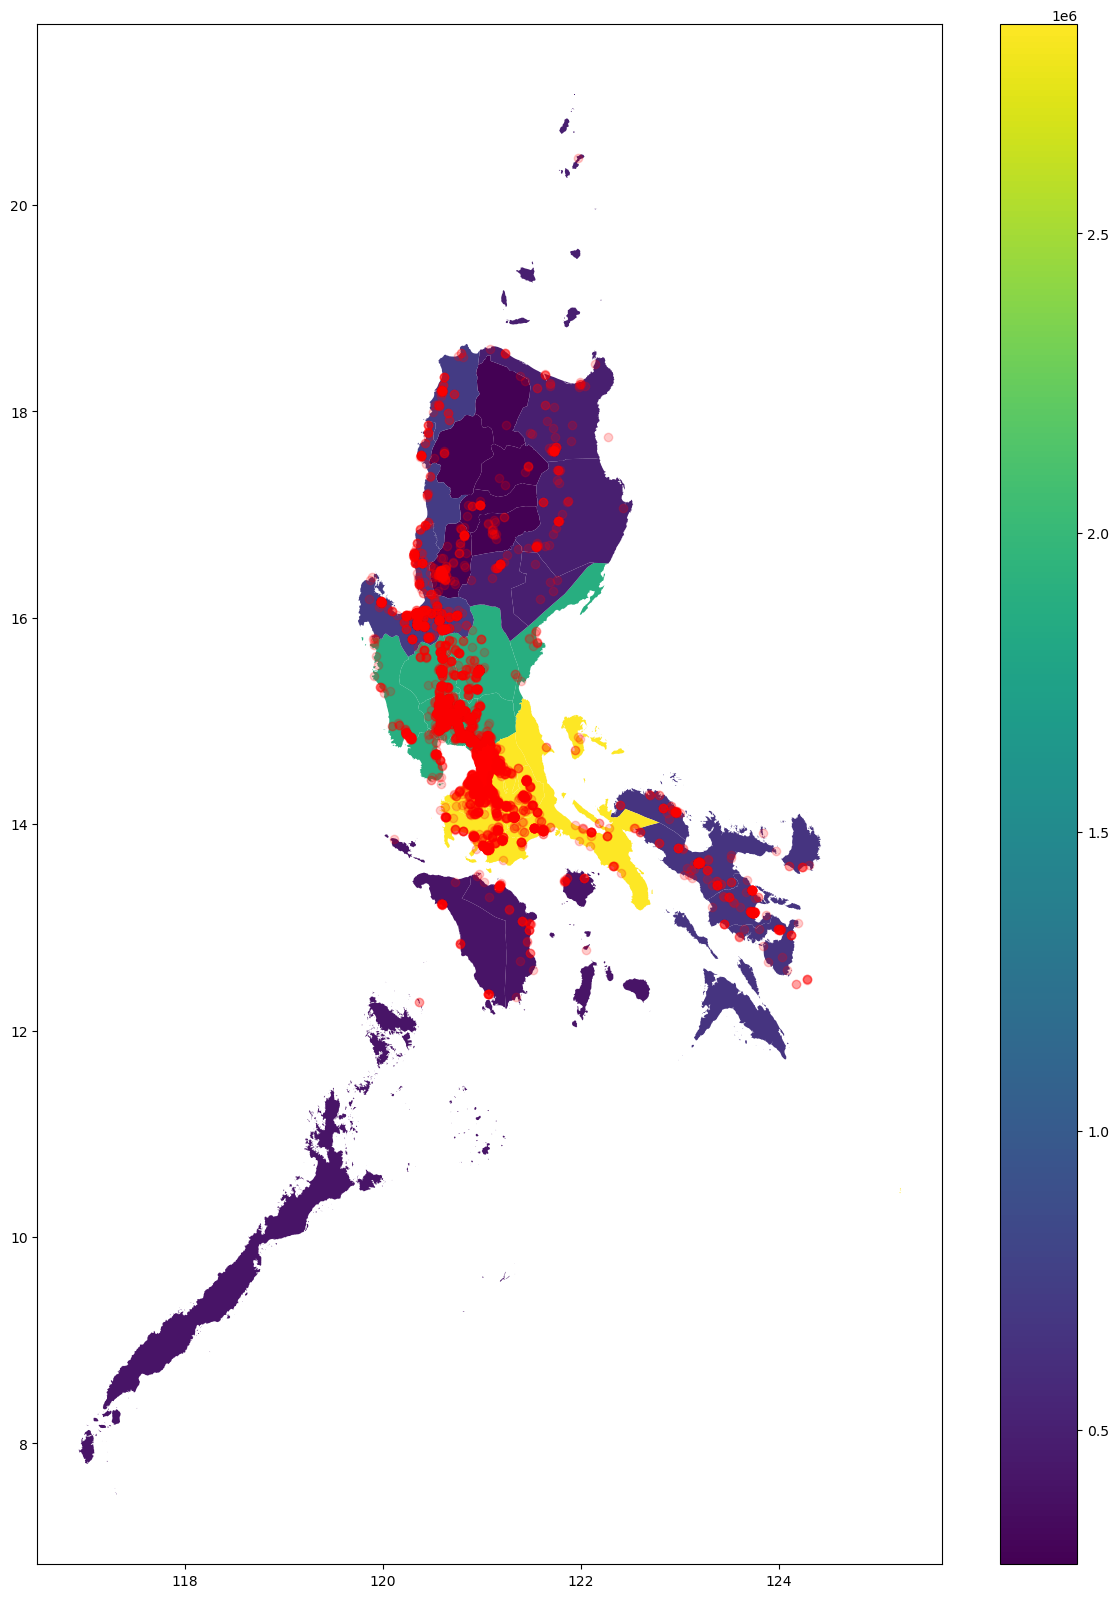

In [208]:
ax = choropleth_df2[[each in ['CAR', 'R1', 'R2', 'R3', 'R4A', 'R5','R4B'] for each in choropleth_df2['region']]].plot(
    figsize=(15,20), 
    column='net', 
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "label": "Missing values",
    }
)

hospital['geometry'].plot(
    ax=ax,
    color='red',
    alpha=0.2
)